In [1]:
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('gender_classification_v7.csv', encoding="latin1")

In [3]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
data['label'] = data['gender'].map({'Female': 0, 'Male': 1})

In [5]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,label
0,1,11.8,6.1,1,0,1,1,Male,1
1,0,14.0,5.4,0,0,1,0,Female,0
2,0,11.8,6.3,1,1,1,1,Male,1
3,0,14.4,6.1,0,1,1,1,Male,1
4,1,13.5,5.9,0,0,0,0,Female,0


In [6]:
X = data[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']]
y = data[['label']]

##**Scaling the Dataset**

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [8]:
standardscaler = StandardScaler()
minmaxscaler = MinMaxScaler()

In [9]:
X_scaled_minmax = minmaxscaler.fit_transform(X)
X_scaled_standard = standardscaler.fit_transform(X)

In [10]:
X_scaled_minmax = pd.DataFrame(X_scaled_minmax)
X_scaled_standard = pd.DataFrame(X_scaled_standard)

##**Splitting the Dataset**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled_minmax,y,test_size=0.2,random_state=2)

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

##**Performing the Model**

In [14]:
gnb = GaussianNB()

0.968031968031968
0.9718875502008032


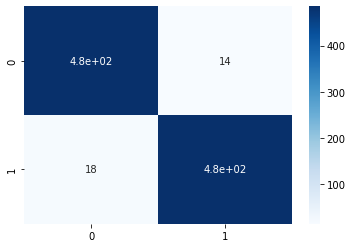

In [15]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
# print(confusion_matrix(y_test,y_pred1))
cm = confusion_matrix(y_test,y_pred1)
sns.heatmap(cm, annot=True,cmap="Blues")
print(precision_score(y_test,y_pred1))